In [1]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
from bert_score import score, BERTScorer
import matplotlib.pyplot as plt
from transformers import pipeline

In [23]:
df = pd.read_csv('falcon7b_baseline_eval.csv')

In [24]:
df

,questions,answer,model_answer,BERTScore_f1,BERTScore_precision,BERTScore_recall
0,What is an eigenvector of a matrix?,An eigenvector of a matrix is a nonzero vector...,an eigenvector for a matrix is a column vector...,0.856095,0.879788,0.833645
1,How does the second hidden layer of a deep lea...,Given the first hidden layer's description of ...,"The second layer, or hidden layer, of a deep l...",0.848625,0.865913,0.832013
2,What is the significance of an inner product i...,An inner product in a vector space provides a ...,The significance of an inner product is that i...,0.872372,0.897827,0.848321
3,What background is assumed for readers of the ...,The book assumes readers have a computer scien...,I assume readers of the 'Deep Learning' book h...,0.900700,0.896025,0.905425
4,What are the main goals of statistical learnin...,The main goals of statistical learning are to ...,The main goals of statistical learning in data...,0.931371,0.933579,0.929173
...,...,...,...,...,...,...
123,How does deep learning address the challenge o...,Deep learning introduces representations in te...,Deep learning addresses the challenge of repre...,0.865792,0.883687,0.848607
124,What is 'outlier detection' in machine learning?,Outlier detection in machine learning is the i...,Outlier detection in machine learning is the p...,0.905499,0.912501,0.898605
125,What is 'long short-term memory' (LSTM) in mac...,Long short-term memory (LSTM) in machine learn...,Long short-term memory (LSTM) in machine learn...,0.911162,0.922170,0.900414
126,What is 'hyperparameter tuning' in machine lea...,Hyperparameter tuning in machine learning invo...,Hyperparameter tuning is a process to optimize...,0.920736,0.927379,0.914188


In [25]:
#questions = df['Question'].tolist()
#ideal_answers = df['Expected Answer'].tolist()
#gen_answers = df['Actual Answer'].tolist()

questions = df['questions'].tolist()
ideal_answers = df['answer'].tolist()
gen_answers = df['model_answer'].tolist()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


System level F1 score: 0.292


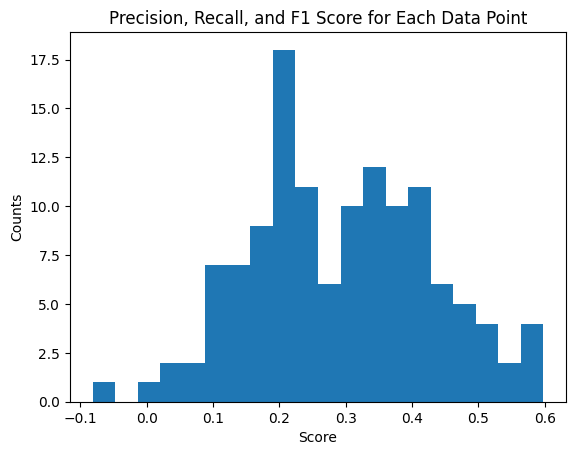

In [26]:

scorer = BERTScorer(lang="en", rescale_with_baseline=True)


P, R, F1 = scorer.score(gen_answers, ideal_answers)

print(f"System level F1 score: {F1.mean():.3f}")


plt.hist(F1, bins=20)
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title('Precision, Recall, and F1 Score for Each Data Point')
plt.show()


System level F1 score: 0.292


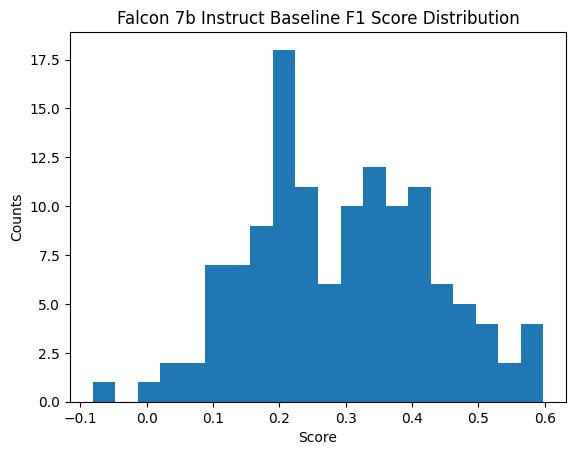

In [30]:
print(f"System level F1 score: {F1.mean():.3f}")


plt.hist(F1, bins=20)
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title('Falcon 7b Instruct Baseline F1 Score Distribution')
plt.show()

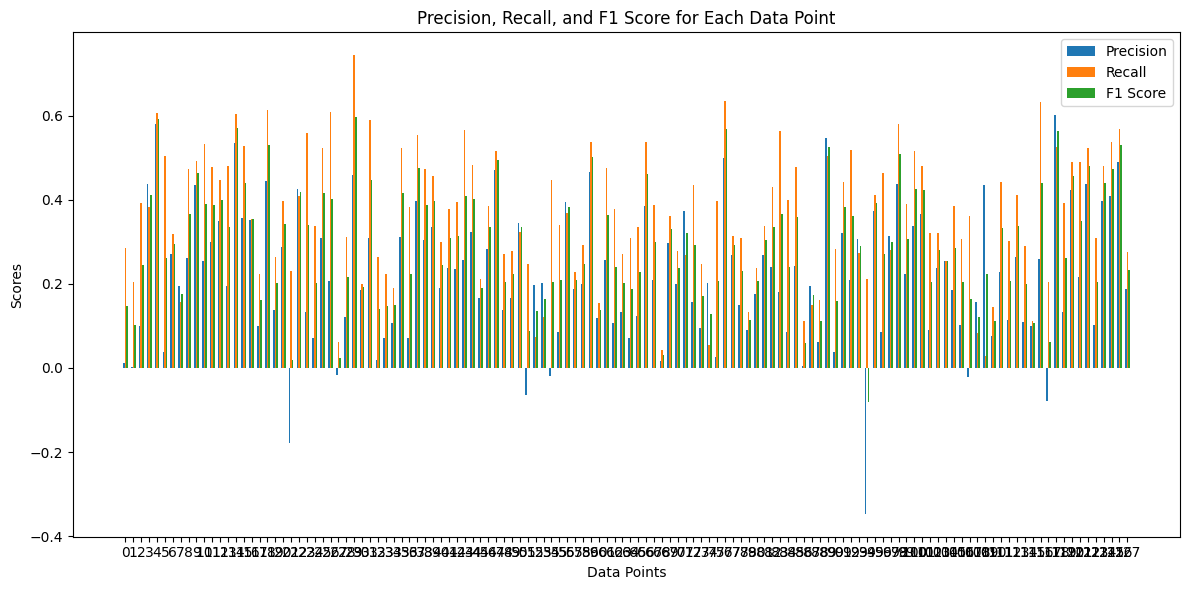

In [27]:
import numpy as np

P = np.array(P)
R = np.array(R)
F1 = np.array(F1)


num_points = len(P)


idx = np.arange(num_points)


bar_width = 0.2


plt.figure(figsize=(12, 6))


plt.bar(idx, P, bar_width, label='Precision')
plt.bar(idx + bar_width, R, bar_width, label='Recall')
plt.bar(idx + 2 * bar_width, F1, bar_width, label='F1 Score')

plt.xlabel('Data Points')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Each Data Point')
plt.xticks(idx + bar_width, idx)


plt.legend()


plt.tight_layout()
plt.show()


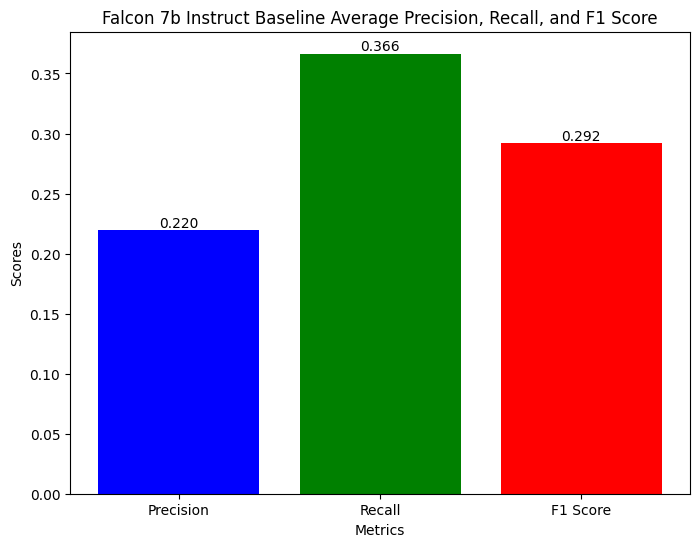

In [31]:


average_precision = P.mean()
average_recall = R.mean()
average_f1 = F1.mean()

scores = [average_precision, average_recall, average_f1]
labels = ['Precision', 'Recall', 'F1 Score']


plt.figure(figsize=(8, 6))

barlist = plt.bar(labels, scores, color=['blue', 'green', 'red'])

for idx, bar in enumerate(barlist):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{scores[idx]:.3f}', ha='center', va='bottom')


plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Falcon 7b Instruct Baseline Average Precision, Recall, and F1 Score')


plt.show()
